In [1]:
import functools
import numpy as np
import sklearn.metrics
import sklearn.datasets
import sklearn.model_selection
import matplotlib.pyplot as plt

import ga.ga as ga
from ga.MLP import *
from ga.utils import *

In [2]:
# Load MNIST digits from sklearn
num_classes = 10
mnist = sklearn.datasets.load_digits(n_class=num_classes)
X, X_test, y, y_test = sklearn.model_selection.train_test_split(mnist.data, mnist.target)

num_inputs = X.shape[1]

y_true = np.zeros((len(y), num_classes))
for i in range(len(y)):
    y_true[i, y[i]] = 1

y_test_true = np.zeros((len(y_test), num_classes))
for i in range(len(y_test)):
    y_test_true[i, y_test[i]] = 1


In [3]:
# Set up
shape = (num_inputs, 16, 16, num_classes)  # Increase the number of neurons in the hidden layers

obj_func = functools.partial(eval_neural_network, shape=shape, X=X, y=y_true.T)

population_size = 128
mutation_rate = 0.8
crossover_rate = 0.8
num_generations = 1000

In [4]:
genetic_algo = ga.GeneticAlgorithm(obj_func, dim_weights(shape), population_size, X, y, shape,
                                  mutation_rate=mutation_rate, crossover_rate=crossover_rate)
# Train...
result = genetic_algo.minimize(num_generations, X_test, y_test, shape)

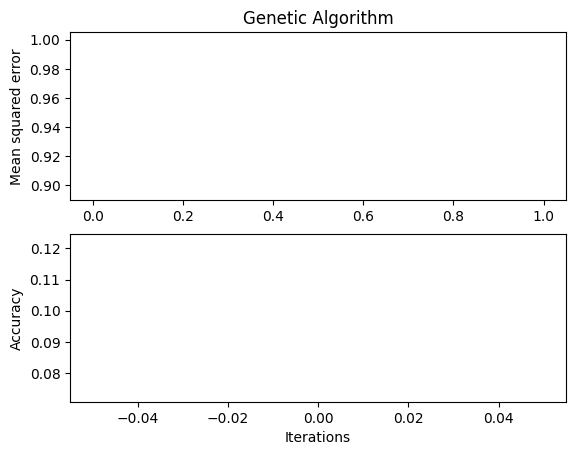

In [5]:
# Plot
error = [tup[0] for tup in result.best_scores]
iters = [tup[1] for tup in result.best_scores]
figure = plt.figure()
errorplot = plt.subplot(2, 1, 1)
errorplot.plot(error, iters)
plt.title("Genetic Algorithm")
plt.ylabel("Mean squared error")

accuracyplot = plt.subplot(2, 1, 2)
accuracyplot.plot(result.accuracies)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")

plt.show()

In [6]:
# Test...
best_weights = vector_to_weights(genetic_algo.best_individual, shape)
best_nn = MultiLayerPerceptron(shape)
best_nn.weights = best_weights
y_test_pred = np.round(best_nn.run(X_test))
print(sklearn.metrics.classification_report(y_test_true, y_test_pred.T))


              precision    recall  f1-score   support

           0       0.10      1.00      0.18        45
           1       0.11      1.00      0.20        50
           2       0.11      1.00      0.20        50
           3       0.10      1.00      0.18        45
           4       0.10      1.00      0.17        43
           5       0.09      1.00      0.17        42
           6       0.07      1.00      0.14        33
           7       0.12      1.00      0.21        52
           8       0.12      1.00      0.22        55
           9       0.08      1.00      0.14        35

   micro avg       0.10      1.00      0.18       450
   macro avg       0.10      1.00      0.18       450
weighted avg       0.10      1.00      0.19       450
 samples avg       0.10      1.00      0.18       450

